In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import operator

class GridNumber:
    def __init__(self, value, highlighted=False):
        self.value = str(value)
        self.highlighted = bool(highlighted)
    def __repr__(self):
        return f"GridNumber({self.value}, highlighted={self.highlighted})"

def draw_mirror_grid(mirrors, left=None, top=None, right=None, bottom=None, ax=None, title=None):
    rows, cols = mirrors.shape
    
    if left is None:
        left = [GridNumber(' ')]*rows
    if top is None:
        top = [GridNumber(' ')]*cols
    if right is None:
        right = [GridNumber(' ')]*rows
    if bottom is None:
        bottom = [GridNumber(' ')]*cols
            
    thick_lw = 4
    thin_lw = 1
    
    if ax is None:
        _, ax = plt.subplots(figsize=(cols, rows))
    
    ax.set_xlim(0-1.5, cols+1.5)
    ax.set_ylim(0-1.5, rows+1.5)
    ax.set_aspect('equal')
    ax.axis('off')
    if title:
        ax.set_title(title, fontsize=22)
        
    for r,c in itertools.product(range(rows), range(cols)):
        x, y = c, rows - 1 - r
        rect = patches.Rectangle((x, y), 1, 1, linewidth=thin_lw, edgecolor='black', facecolor='white')
        ax.add_patch(rect)
        
        if mirrors[r,c] == '\\':
            ax.plot([x+0.15,x+0.85], [y+0.85,y+0.15], color='orange', linewidth=3)
        elif mirrors[r,c] == '/':
            ax.plot([x+0.15,x+0.85], [y+0.15,y+0.85], color='orange', linewidth=3)

    for r in range(rows):
        y = rows - 1 - r
        ax.plot(-0.5, 0.5 + y, 'o', color='black')
        ax.text(-0.85, 0.48 + y, left[r].value, color='red' if left[r].highlighted else 'black', va='center', ha='right', fontsize=13)
        ax.plot(cols + 0.5, 0.5 + y, 'o', color='black')
        ax.text(cols + 0.85, 0.48 + y, right[r].value, color='red' if right[r].highlighted else 'black', va='center', ha='left', fontsize=13)
        
    for c in range(cols):
        x = c
        ax.plot(x + 0.5, rows + 0.5, 'o', color='black')
        ax.text(x + 0.5, rows + 0.85, top[c].value, color='red' if top[c].highlighted else 'black', va='bottom', ha='center', fontsize=13)
        ax.plot(x + 0.5, -0.5, 'o', color='black')
        ax.text(x + 0.5, -0.85, bottom[c].value, color='red' if bottom[c].highlighted else 'black', va='top', ha='center', fontsize=13)
        
    ax.plot([0, 0, cols, cols, 0], [0, rows, rows, 0, 0], color='black', linewidth=thick_lw)


In [3]:
grid_regions = r"""
        3    12    112   56    48   3087    9    405    4     1
     +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
     |     |     | \   |     |     |     | \   |     |     | \   |
  27 |     |     |   \ |     |     |     |   \ |     |     |   \ | 1
     +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
     |     |     |     |     |     |     |     |     | \   |     |
2025 |     |     |     |     |     |     |     |     |   \ |     | 4
     +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
     |   / |     |     |     |   / |     |     |   / |     |     |
   3 | /   |     |     |     | /   |     |     | /   |     |     | 27
     +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
     |     |     |   / |     |     |     |     |     |     | \   |
  27 |     |     | /   |     |     |     |     |     |     |   \ | 9
     +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
     |     |     |     |     |     |     |   / |     |     |     |
 112 |     |     |     |     |     |     | /   |     |     |     | 64
     +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
     |     |   / |     |     | \   |     |     | \   |     |     |
  12 |     | /   |     |     |   \ |     |     |   \ |     |     | 27
     +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
     |   / |     | \   |     |     |   / |     |     |   / |     |
  48 | /   |     |   \ |     |     | /   |     |     | /   |     | 16
     +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
     |     |     |     | \   |     |     |     |     |     |     |
  12 |     |     |     |   \ |     |     |     |     |     |     | 56
     +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
     |     |     |     |     |   / |     |   / |     |   / |     |
 225 |     |     |     |     | /   |     | /   |     | /   |     | 4
     +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
     |   / |     |     |     |     |   / |     |     |     |     |
  24 | /   |     |     |     |     | /   |     |     |     |     | 5
     +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
      2025   225   24    12    64     5    16    405    4   3087
"""

lines = grid_regions.strip('\n').split('\n')
top_numbers = np.array(lines[0].split(), dtype=np.uint64)
left_numbers, right_numbers = np.array(tuple(zip(*map(lambda l: [l.split()[0], l.split()[-1]], lines[3:-1:3]))), dtype=np.uint64)
bottom_numbers = np.array(lines[-1].split(), dtype=np.uint64)
mirrors = np.array(list(map(lambda l: list(map(str.strip, l.split('|')[1:-1])), lines[3:-1:3])))

In [4]:
import itertools as it
left = tuple(it.starmap(GridNumber, zip(left_numbers, [1, 1, 1, 0, 1, 1, 1, 0, 0, 1])))
top = tuple(it.starmap(GridNumber, zip(top_numbers, [1, 1, 0, 1, 0, 0, 0, 1, 1, 0])))
right = tuple(it.starmap(GridNumber, zip(right_numbers, [1, 0, 0, 1, 1, 1, 0, 1, 1, 1])))
bottom = tuple(it.starmap(GridNumber, zip(bottom_numbers, [0, 1, 1, 0, 0, 0, 1, 0, 1, 1])))

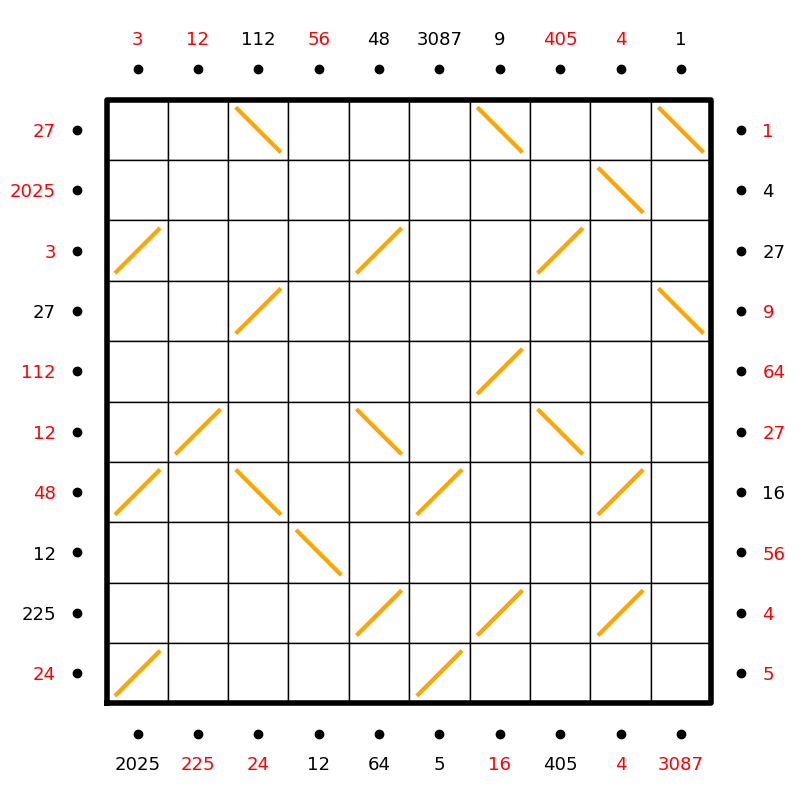

In [5]:
fig, ax= plt.subplots(figsize=(8, 8), constrained_layout=True)
draw_mirror_grid(mirrors, left=left, top=top, right=right, bottom=bottom, ax=ax)
fig.savefig('mirrors_3_sol.png', dpi=72*2)